In [3]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

train = pd.read_csv('./train.csv')

In [4]:
results_df = pd.DataFrame(columns=['종목코드', 'final_return'])
unique_codes = train['종목코드'].unique()

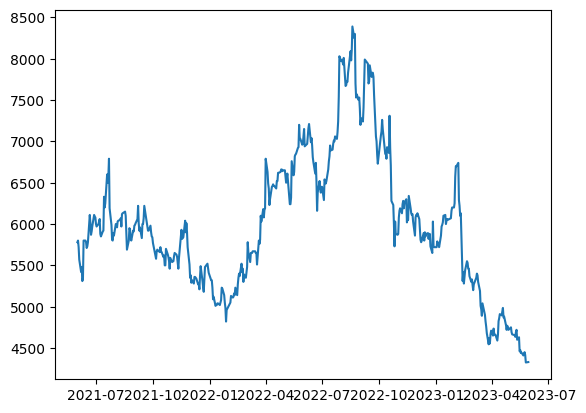

In [15]:
code = unique_codes[1]
train_close = train[train['종목코드'] == code][['일자', '종가']]
train_close['일자'] = pd.to_datetime(train_close['일자'], format='%Y%m%d')
#train_close.set_index('일자', inplace=True)
plt.plot(train_close.일자, train_close.종가)
plt.show()

In [16]:
train_close.set_index('일자', inplace=True)
train_close

,종가
일자,
2021-06-01,5780
2021-06-02,5800
2021-06-03,5720
2021-06-04,5570
2021-06-07,5420
...,...
2023-05-23,4430
2023-05-24,4450
2023-05-25,4415


<Figure size 640x480 with 0 Axes>

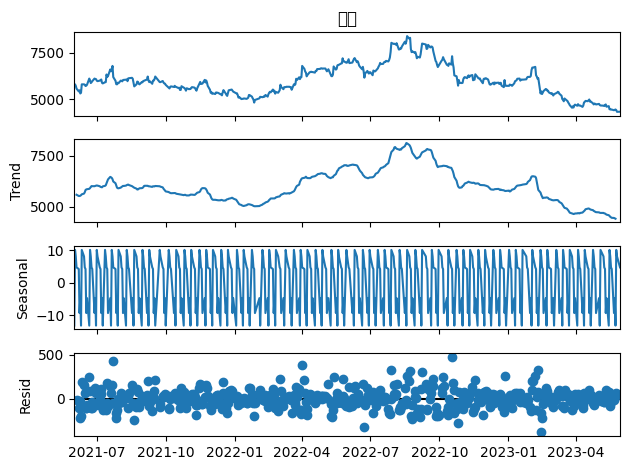

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_close["종가"], model="additive", period=7)
fig = plt.figure()
fig = result.plot()

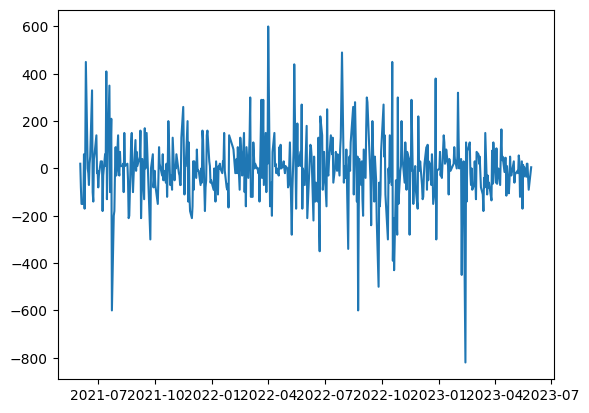

In [21]:
diff1 = train_close["종가"].diff().dropna()
plt.plot(diff1)
plt.show()

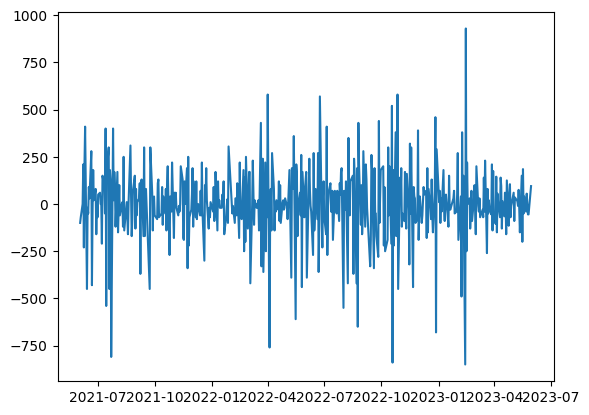

In [22]:
diff2 = diff1.diff().dropna()
plt.plot(diff2)
plt.show()